In [1]:
import numpy as np

# Define the dataset
X = np.array([[1, 2], [1, 3], [1, 4]])  # Features (with bias term added)
y = np.array([[5], [7], [9]])           # Target values

# Normal Equation: theta = (X^T X)^(-1) X^T y
def normal_equation(X, y):
    # Step 1: Compute X^T X
    X_transpose_X = np.dot(X.T, X)
    
    # Step 2: Compute the inverse of X^T X
    X_transpose_X_inv = np.linalg.inv(X_transpose_X)
    
    # Step 3: Compute X^T y
    X_transpose_y = np.dot(X.T, y)
    
    # Step 4: Compute theta
    theta = np.dot(X_transpose_X_inv, X_transpose_y)
    
    return theta

# Calculate theta
theta = normal_equation(X, y)

# Print the result
print("Optimal parameters (theta):")
print(theta)

Optimal parameters (theta):
[[1.]
 [2.]]


In [3]:
import numpy as np

# Define the dataset
X = np.array([[1, 2], [1, 3], [1, 4]])  # Features (with bias term added)
y = np.array([[5], [7], [9]])           # Target values

# Hyperparameters
alpha = 0.01  # Learning rate
num_iters = 1000  # Number of iterations

# Initialize parameters (theta) to zeros
theta = np.zeros((X.shape[1], 1))

# Gradient Descent
def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)  # Number of data points
    cost_history = []  # To store the cost at each iteration

    for _ in range(num_iters):
        # Compute predictions
        predictions = np.dot(X, theta)

        # Compute errors
        errors = predictions - y

        # Compute gradient
        gradient = (1/m) * np.dot(X.T, errors)

        # Update parameters
        theta -= alpha * gradient

        # Compute cost (optional, for monitoring)
        cost = (1/(2*m)) * np.sum(errors ** 2)
        cost_history.append(cost)

    return theta, cost_history

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iters)

# Print the result
print("Optimal parameters (theta):")
print(theta)

# Print the final cost
print("Final cost:", cost_history[-1])

Optimal parameters (theta):
[[0.81771447]
 [2.05694171]]
Final cost: 0.0011478994411741367


Lasso Regression Coefficients (β):
[61.73533197 98.81324823 61.14317626 54.88180776 35.51142837]


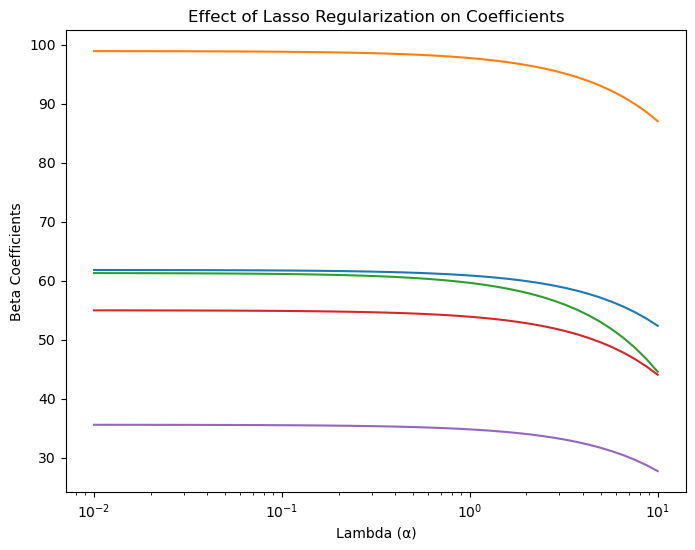

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # α (lambda) controls regularization strength
lasso.fit(X, y)

# Print the estimated Beta coefficients
print("Lasso Regression Coefficients (β):")
print(lasso.coef_)

# Plot effect of lambda on coefficients
alphas = np.logspace(-2, 1, 50)  # Different alpha values
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

plt.figure(figsize=(8, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Lambda (α)")
plt.ylabel("Beta Coefficients")
plt.title("Effect of Lasso Regularization on Coefficients")
plt.show()


Ridge Regression Coefficients (β):
[61.23949497 97.79581017 60.24721716 54.3702388  35.37785535]


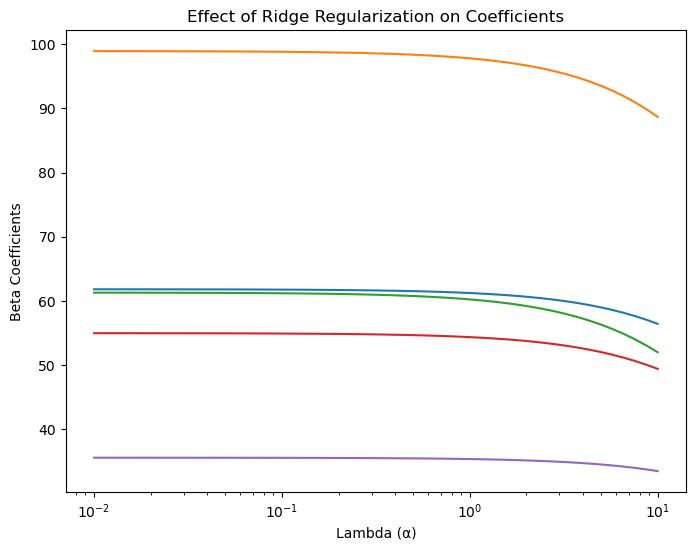

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression

# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Apply Ridge Regression
ridge = Ridge(alpha=1.0)  # α (lambda) controls regularization strength
ridge.fit(X, y)

# Print the estimated Beta coefficients
print("Ridge Regression Coefficients (β):")
print(ridge.coef_)

# Plot effect of lambda on coefficients
alphas = np.logspace(-2, 1, 50)  # Different alpha values
coefs = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

plt.figure(figsize=(8, 6))
plt.plot(alphas, coefs)
plt.xscale("log")
plt.xlabel("Lambda (α)")
plt.ylabel("Beta Coefficients")
plt.title("Effect of Ridge Regularization on Coefficients")
plt.show()


Intercept (β0): 1.1651153205269735
Slope (β1): 44.43716999225498


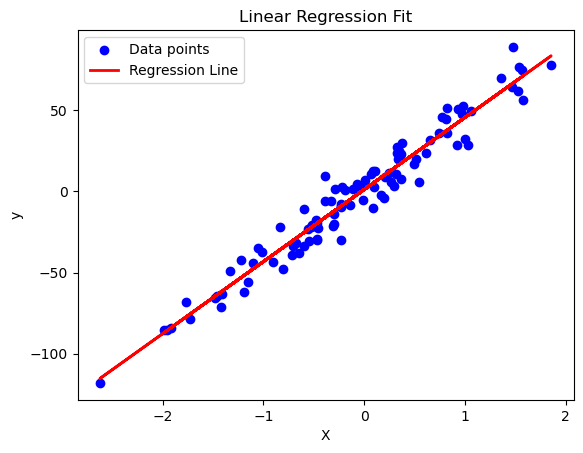

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic data
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Apply Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Print the estimated Beta coefficients
print("Intercept (β0):", lin_reg.intercept_)
print("Slope (β1):", lin_reg.coef_[0])

# Plot the regression line
plt.scatter(X, y, color='blue', label="Data points")
plt.plot(X, lin_reg.predict(X), color='red', linewidth=2, label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()
